In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('customer(3).csv')

In [3]:
#df = pd.read_csv('merged_rates2.csv')

In [4]:
#len(df['Property Name'])

In [5]:
df.tail()

,title,fname,lname,haddress1,haddress2,hcity,hstate,hcountry,resconfirmid,ressource,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate
24901,Miss,Pavithra,Test,120 CAMPDEN HILL RD.,NaN,London,NaN,United Kingdom,5194484,XML,2,1,317.30,2,1,2023-02-20,2023-01-20
24902,Miss,Pavithra,Test,120 CAMPDEN HILL RD.,NaN,London,NaN,United Kingdom,5194485,XML,2,1,317.30,2,1,2023-02-23,2023-01-20
24903,Mr,TestFirstNameXML,TestLastNameXML,"no 245,akkara8",NaN,Las Vegas,NaN,USA,5194486,XML,1,1,118.00,1,0,2023-03-20,2023-01-25
24904,MR,CheckerA,Anixe,Brandbachstrasse 10,NaN,Dietlikon,NaN,Switzerland,5194487,XML,2,1,552.76,2,0,2023-03-30,2023-01-26
24905,MR,CheckerA,Anixe,Brandbachstrasse 10,NaN,Dietlikon,NaN,Switzerland,5194488,XML,2,1,552.76,2,0,2023-03-30,2023-01-26


In [6]:
#max(df['Search DateTime'])

In [7]:
df.tail(5)

,title,fname,lname,haddress1,haddress2,hcity,hstate,hcountry,resconfirmid,ressource,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate
24901,Miss,Pavithra,Test,120 CAMPDEN HILL RD.,NaN,London,NaN,United Kingdom,5194484,XML,2,1,317.30,2,1,2023-02-20,2023-01-20
24902,Miss,Pavithra,Test,120 CAMPDEN HILL RD.,NaN,London,NaN,United Kingdom,5194485,XML,2,1,317.30,2,1,2023-02-23,2023-01-20
24903,Mr,TestFirstNameXML,TestLastNameXML,"no 245,akkara8",NaN,Las Vegas,NaN,USA,5194486,XML,1,1,118.00,1,0,2023-03-20,2023-01-25
24904,MR,CheckerA,Anixe,Brandbachstrasse 10,NaN,Dietlikon,NaN,Switzerland,5194487,XML,2,1,552.76,2,0,2023-03-30,2023-01-26
24905,MR,CheckerA,Anixe,Brandbachstrasse 10,NaN,Dietlikon,NaN,Switzerland,5194488,XML,2,1,552.76,2,0,2023-03-30,2023-01-26


In [8]:
df['title'].unique()

array(['-', 'Frau', 'Mr', 'Mrs', 'MR.', 'MRS.', 'MR', 'Ms', 'Herr',
       'Herr Dr.', 'Mr.', 'MISS', 'MRS', 'Miss', 'mrs', 'Mrs.', 'Mstr',
       'Dr', 'mr', 'MS', 'M', 'Mrw', 'Frau Dr.', 'MME', 'Al', 'DR', 'ms',
       'MRs', 'Prof', 'ddjdjdjddj', 'Frau Prof.', 'miss', 'Herr Prof.',
       'Me', 'Ns', 'mR', 'Master', 'Mr./Mrs.', nan, 'Lord', 'Sir', 'CHD',
       'Mx'], dtype=object)

In [9]:
import gender_guesser.detector as gender

d = gender.Detector()

In [10]:
def infer_gender(name):
    return d.get_gender(name)

In [11]:
df["gender"] = df["fname"].apply(infer_gender)

In [12]:
def map_title_to_gender(title):
    if title in ["Mr.", "Master",'MR.',"Mr","Master",'mr']:
        return "male"
    elif title in ["Ms.", "Miss", "Mrs.","MISS",'mrs']:
        return "female"
    else:
        return "unknown"


In [13]:
df['gender'] = df['title'].apply(map_title_to_gender)


In [14]:
df.loc[df["gender"] == "unknown", "gender"] = df.loc[df["gender"] == "unknown", "fname"].apply(infer_gender)

In [15]:
#df = df[['title','fname','lname','haddress1','hcity','hstate','hcountry','resconfirmid',ressource,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,gender]]



In [16]:
df.head()

,title,fname,lname,haddress1,haddress2,hcity,hstate,hcountry,resconfirmid,ressource,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender
0,-,Laurence,WACQUEZ,6 rue St. Victor,NaN,Paris,NaN,France,5171700,CC,1,1,209.0,3,0,2019-08-20,2019-04-26,female
1,Frau,Nicola,Somfleth,Nebendahlstr. 16,NaN,Hamburg,NaN,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female
2,Frau,Nicola,Somfleth,Nebendahlstr. 16,NaN,Hamburg,NaN,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female
3,Mr,Michael,Burke,194 KENSINGTON HIGH STREET,NaN,London,NaN,United Kingdom,5171702,CC,2,1,300.0,2,0,2019-05-19,2019-04-26,male
4,Mr,Peter,Hamilton,New Mill,New Mill Lane,London,NaN,United Kingdom,5171703,CC,3,1,1059.0,2,0,2019-06-15,2019-04-26,male


In [17]:
df = df.drop(['hstate','haddress2'], axis=1)

In [18]:
df.rename(columns = {'haddress1':'address', 'hcity':'city','hcountry':'country'}, inplace = True)

In [19]:
df.head()

,title,fname,lname,address,city,country,resconfirmid,ressource,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender
0,-,Laurence,WACQUEZ,6 rue St. Victor,Paris,France,5171700,CC,1,1,209.0,3,0,2019-08-20,2019-04-26,female
1,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female
2,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female
3,Mr,Michael,Burke,194 KENSINGTON HIGH STREET,London,United Kingdom,5171702,CC,2,1,300.0,2,0,2019-05-19,2019-04-26,male
4,Mr,Peter,Hamilton,New Mill,London,United Kingdom,5171703,CC,3,1,1059.0,2,0,2019-06-15,2019-04-26,male


In [20]:
# def infer_gender(row):
#     totnoofchildren = row['totnoofchildren']
#     totnoofrooms = row['totnoofrooms']
#     noofnights = row['noofnights']
#     totnoofadults = row['totnoofadults']
    
#     if totnoofchildren == 0:
#         if totnoofadults == 1
#             return 'single'
#         elif totnoofadults = 2
#     elif title == 'Ms.' or title == 'Mrs.':
#         return 'female'
#     else:
#         return d.get_gender(name)



In [21]:
# # Apply the function to the DataFrame
# df["Marital_Status"] = df.apply(infer_gender, axis=1)

In [22]:
def map_marital_status(title):
    if title in ["Mr.", 'MR.',"Mr",'mr', "Ms.",  "Mrs.",'mrs','Frau']:
        return "married"
    else:
        return "single"

In [23]:
df['marital_status'] = df['title'].apply(map_marital_status)

In [24]:
df.head()

,title,fname,lname,address,city,country,resconfirmid,ressource,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender,marital_status
0,-,Laurence,WACQUEZ,6 rue St. Victor,Paris,France,5171700,CC,1,1,209.0,3,0,2019-08-20,2019-04-26,female,single
1,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female,married
2,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female,married
3,Mr,Michael,Burke,194 KENSINGTON HIGH STREET,London,United Kingdom,5171702,CC,2,1,300.0,2,0,2019-05-19,2019-04-26,male,married
4,Mr,Peter,Hamilton,New Mill,London,United Kingdom,5171703,CC,3,1,1059.0,2,0,2019-06-15,2019-04-26,male,married


In [25]:
df['ressource'].unique()

array(['CC', 'XML', 'WEB'], dtype=object)

In [26]:
def infer_trip_type(row):
    totnoofchildren = row['totnoofchildren']
    totnoofrooms = row['totnoofrooms']
    noofnights = row['noofnights']
    totnoofadults = row['totnoofadults']
    
    if totnoofchildren == 0:
        if totnoofadults >= 1 and noofnights <= 2:
            return 'business'
        else: 
            return 'group'
    else:
        return 'Leisure'
   

In [27]:
# Apply the function to the DataFrame
df["Trip_Type"] = df.apply(infer_trip_type, axis=1)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24906 entries, 0 to 24905
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            24884 non-null  object 
 1   fname            24906 non-null  object 
 2   lname            24906 non-null  object 
 3   address          24774 non-null  object 
 4   city             24906 non-null  object 
 5   country          24906 non-null  object 
 6   resconfirmid     24906 non-null  int64  
 7   ressource        24906 non-null  object 
 8   noofnights       24906 non-null  int64  
 9   totnoofrooms     24906 non-null  int64  
 10  totalrate        24906 non-null  float64
 11  totnoofadults    24906 non-null  int64  
 12  totnoofchildren  24906 non-null  int64  
 13  checkindate      24906 non-null  object 
 14  reservationdate  24906 non-null  object 
 15  gender           24906 non-null  object 
 16  marital_status   24906 non-null  object 
 17  Trip_Type   

In [29]:
df['fname'] = df['fname'].astype(str)

In [30]:
df.rename(columns = {'ressource':'Booking Channel'}, inplace = True)

In [31]:
df['repeats'] = df.duplicated('fname').sum()

In [32]:
df['repeats'].unique()

array([20418])

In [33]:
df.tail()

,title,fname,lname,address,city,country,resconfirmid,Booking Channel,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender,marital_status,Trip_Type,repeats
24901,Miss,Pavithra,Test,120 CAMPDEN HILL RD.,London,United Kingdom,5194484,XML,2,1,317.30,2,1,2023-02-20,2023-01-20,female,single,Leisure,20418
24902,Miss,Pavithra,Test,120 CAMPDEN HILL RD.,London,United Kingdom,5194485,XML,2,1,317.30,2,1,2023-02-23,2023-01-20,female,single,Leisure,20418
24903,Mr,TestFirstNameXML,TestLastNameXML,"no 245,akkara8",Las Vegas,USA,5194486,XML,1,1,118.00,1,0,2023-03-20,2023-01-25,male,married,business,20418
24904,MR,CheckerA,Anixe,Brandbachstrasse 10,Dietlikon,Switzerland,5194487,XML,2,1,552.76,2,0,2023-03-30,2023-01-26,unknown,single,business,20418
24905,MR,CheckerA,Anixe,Brandbachstrasse 10,Dietlikon,Switzerland,5194488,XML,2,1,552.76,2,0,2023-03-30,2023-01-26,unknown,single,business,20418


In [34]:
duplicate_df = df[df.duplicated(subset=['fname','lname'],keep=False)].sort_values(by=['fname','lname'])
count_df = duplicate_df.groupby(['fname','lname']).size().reset_index(name='repeats')

In [35]:
duplicate_df.head()

,title,fname,lname,address,city,country,resconfirmid,Booking Channel,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender,marital_status,Trip_Type,repeats
13220,-,-,-,132 Boylston St.,Boston,USA,5184316,CC,2,1,213.56,2,0,2019-01-01,2018-10-08,unknown,single,business,20418
19676,Mr,-,-,im her,New York,USA,5190100,CC,1,2,0.00,2,0,2020-03-29,2020-03-11,male,married,business,20418
11339,-,-,Aline Sophie Kaiser,Biewerer Strasse 15,Trier,Germany,5182546,CC,1,1,154.00,1,0,2019-03-30,2018-11-16,unknown,single,business,20418
11340,-,-,Aline Sophie Kaiser,Biewerer Strasse 15,Trier,Germany,5182547,CC,1,1,184.00,1,0,2019-03-29,2018-11-16,unknown,single,business,20418
11117,-,-,Eric Combet,55 Rue Sainte Anne,Paris,France,5182332,CC,2,1,350.00,2,0,2019-07-17,2018-11-20,unknown,single,business,20418


In [36]:
count_df['repeats'].unique()

array([  2,   4,   3,   5,   6,   7,  27,   8,  16,  11,  12,  13,  42,
        15,  25,   9,  45,  18,  67,  98,  32,  19,  74,  10,  23,  14,
        22,  20,  24,  29,  36, 459,  35,  26,  51,  21,  33,  84,  30,
        76, 125,  53,  17,  38,  59,  63,  54, 214,  90,  28,  46,  31,
        34,  37,  50,  66])

In [37]:

# Group the DataFrame by first name, last name, and date
grouped = df.groupby(['fname', 'lname', 'checkindate']).size()

# Find the names that appear more than once
repeating_names = grouped[grouped > 0]

# Rename the last column to 'visit_count'
repeating_names = repeating_names.rename("visit_count")



In [38]:
# Group the DataFrame by first name, last name, and date
grouped = df.groupby(['fname', 'lname', 'checkindate']).size()

# Find the names that appear more than once
repeating_names = grouped[grouped > 1]



In [39]:
repeating_names

fname  lname         checkindate
-      Eric Combet   2019-07-09     2
                     2019-07-17     2
       Eric Monnier  2019-09-04     2
       John Moody    2019-10-11     2
                     2019-10-13     4
                                   ..
wer    sdj           2019-05-18     2
                     2019-09-26     2
       wer           2019-07-18     4
wewe   csd           2019-09-18     2
xzcsz  Sadaf         2020-08-18     2
Length: 2283, dtype: int64

In [40]:
# duplicate_rows = df[duplicate_mask].assign(visit_count=1)
# duplicate_rows = duplicate_rows.groupby(['fname', 'lname', 'checkindate']).count()

# duplicate_rows = df[duplicate_mask].groupby(['fname', 'lname', 'checkindate']).size().reset_index(name='visit_count') 



## ------

In [41]:
df['customer_type'] = 'new'

# Group the DataFrame by first name and last name
grouped = df.groupby(['fname', 'lname']).size().reset_index(name='visit_count')



In [42]:
grouped = grouped.astype({'visit_count':'int'})

In [43]:
type(df['checkindate'][0])

str

In [44]:
df['checkindate']= pd.to_datetime(df['checkindate'])

In [45]:
df['checkindate'][0]

Timestamp('2019-08-20 00:00:00')

In [46]:
df['checkindate'][1]

Timestamp('2019-07-27 00:00:00')

In [47]:
(df['checkindate'][0]-df['checkindate'][1]).days

24

In [48]:
type(grouped.visit_count[1])

numpy.int64

In [49]:
for index, row in grouped.iterrows():
    # If a customer has visited more than once
    if row['visit_count'] > 1:
        # Get the rows of that customer from the original DataFrame
        customer_rows = df[(df['fname'] == row['fname']) & (df['lname'] == row['lname'])]
        # Sort the rows by date
        customer_rows = customer_rows.sort_values(by='checkindate')
        # If the most recent visit is within 30 days of the second most recent visit
        if (customer_rows.iloc[-1]['checkindate'] - customer_rows.iloc[-2]['checkindate']).days <= 30:
            # Mark the customer as 'returning'
            df.loc[(df['fname'] == row['fname']) & (df['lname'] == row['lname']), 'customer_type'] = 'returning'
        else:
            # Mark the customer as 'regular'
            df.loc[(df['fname'] == row['fname']) & (df['lname'] == row['lname']), 'customer_type'] = 'regular'


In [50]:
df.head()

,title,fname,lname,address,city,country,resconfirmid,Booking Channel,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender,marital_status,Trip_Type,repeats,customer_type
0,-,Laurence,WACQUEZ,6 rue St. Victor,Paris,France,5171700,CC,1,1,209.0,3,0,2019-08-20,2019-04-26,female,single,business,20418,new
1,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female,married,business,20418,returning
2,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female,married,business,20418,returning
3,Mr,Michael,Burke,194 KENSINGTON HIGH STREET,London,United Kingdom,5171702,CC,2,1,300.0,2,0,2019-05-19,2019-04-26,male,married,business,20418,new
4,Mr,Peter,Hamilton,New Mill,London,United Kingdom,5171703,CC,3,1,1059.0,2,0,2019-06-15,2019-04-26,male,married,group,20418,returning


In [51]:
df.head(2)

,title,fname,lname,address,city,country,resconfirmid,Booking Channel,noofnights,totnoofrooms,totalrate,totnoofadults,totnoofchildren,checkindate,reservationdate,gender,marital_status,Trip_Type,repeats,customer_type
0,-,Laurence,WACQUEZ,6 rue St. Victor,Paris,France,5171700,CC,1,1,209.0,3,0,2019-08-20,2019-04-26,female,single,business,20418,new
1,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,302.0,2,0,2019-07-27,2019-04-26,female,married,business,20418,returning


In [52]:
df['Booking Channel'].unique()

array(['CC', 'XML', 'WEB'], dtype=object)

In [53]:
age_ranges = {"25": 21, "35": 25, "45": 21, "55": 15, "65": 6, "75":12}


In [54]:
age_values = ['25','35','45','55','65','75']
age_percentages = [0.21, 0.25, 0.21, 0.15, 0.06, 0.12]

In [55]:
df['Age'] = np.random.choice(age_values, p=age_percentages, size=len(df))


In [56]:
df.head()

,title,fname,lname,address,city,country,resconfirmid,Booking Channel,noofnights,totnoofrooms,...,totnoofadults,totnoofchildren,checkindate,reservationdate,gender,marital_status,Trip_Type,repeats,customer_type,Age
0,-,Laurence,WACQUEZ,6 rue St. Victor,Paris,France,5171700,CC,1,1,...,3,0,2019-08-20,2019-04-26,female,single,business,20418,new,75
1,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,...,2,0,2019-07-27,2019-04-26,female,married,business,20418,returning,35
2,Frau,Nicola,Somfleth,Nebendahlstr. 16,Hamburg,Germany,5171701,CC,1,2,...,2,0,2019-07-27,2019-04-26,female,married,business,20418,returning,25
3,Mr,Michael,Burke,194 KENSINGTON HIGH STREET,London,United Kingdom,5171702,CC,2,1,...,2,0,2019-05-19,2019-04-26,male,married,business,20418,new,55
4,Mr,Peter,Hamilton,New Mill,London,United Kingdom,5171703,CC,3,1,...,2,0,2019-06-15,2019-04-26,male,married,group,20418,returning,35


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24906 entries, 0 to 24905
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            24884 non-null  object        
 1   fname            24906 non-null  object        
 2   lname            24906 non-null  object        
 3   address          24774 non-null  object        
 4   city             24906 non-null  object        
 5   country          24906 non-null  object        
 6   resconfirmid     24906 non-null  int64         
 7   Booking Channel  24906 non-null  object        
 8   noofnights       24906 non-null  int64         
 9   totnoofrooms     24906 non-null  int64         
 10  totalrate        24906 non-null  float64       
 11  totnoofadults    24906 non-null  int64         
 12  totnoofchildren  24906 non-null  int64         
 13  checkindate      24906 non-null  datetime64[ns]
 14  reservationdate  24906 non-null  objec

In [58]:
df.to_csv("final_customer.csv")

In [59]:
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.stats as stats
# import pandas as pd

# # create example dataframe
# data = {"col1": np.random.normal(0, 1, 1000),
#         "col2": np.random.normal(2, 1, 1000)}
# df = pd.DataFrame(data)

# # extract columns to plot
# col1 = df["col1"]
# col2 = df["col2"]

# # plot PDFs
# x = np.linspace(-5, 5, 100)
# y1 = stats.norm.pdf(x, col1.mean(), col1.std())
# y2 = stats.norm.pdf(x, col2.mean(), col2.std())

# plt.plot(x, y1, label="col1")
# plt.plot(x, y2, label="col2")

# plt.xlabel("X")
# plt.ylabel("Probability Density")
# plt.title("PDFs for Columns in DataFrame")
# plt.legend()
# plt.show()


In [60]:
import matplotlib.pyplot as plt

In [61]:
type(df['Age'][0])

str

In [62]:
df['Age'] = df['Age'].astype(int)

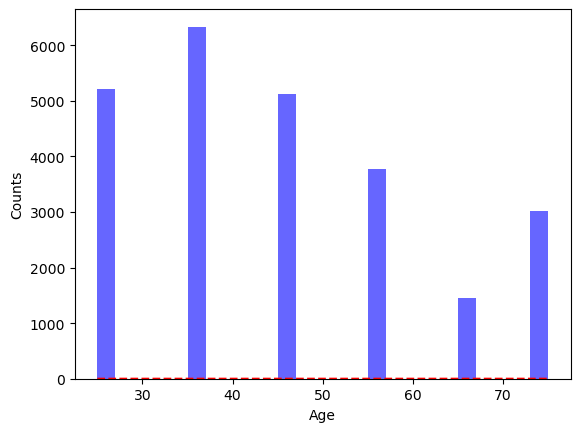

In [63]:
# Select the column to plot
column = 'Age'

# Calculate the mean and standard deviation of the selected column
mu = df[column].mean()
sigma = df[column].std()

# Plot the PDF of the selected column
values, bins, patches = plt.hist(df[column], bins=25, density=False, alpha=0.6, color='blue')
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(bins-mu)**2 / (2*sigma**2))

plt.xlabel("Age")
plt.ylabel("Counts")

plt.plot(bins, pdf, 'r--')

# Save the plot as a PDF
#plt.savefig("pdf_plot.pdf", format='pdf')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24906 entries, 0 to 24905
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            24884 non-null  object        
 1   fname            24906 non-null  object        
 2   lname            24906 non-null  object        
 3   address          24774 non-null  object        
 4   city             24906 non-null  object        
 5   country          24906 non-null  object        
 6   resconfirmid     24906 non-null  int64         
 7   Booking Channel  24906 non-null  object        
 8   noofnights       24906 non-null  int64         
 9   totnoofrooms     24906 non-null  int64         
 10  totalrate        24906 non-null  float64       
 11  totnoofadults    24906 non-null  int64         
 12  totnoofchildren  24906 non-null  int64         
 13  checkindate      24906 non-null  datetime64[ns]
 14  reservationdate  24906 non-null  objec

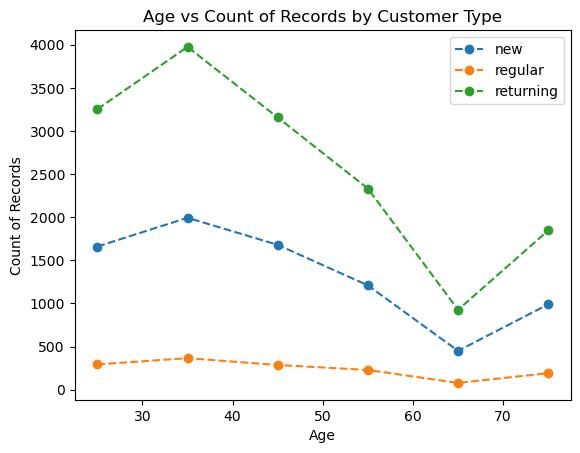

In [70]:
# group the data by gender and age
grouped = df.groupby(['customer_type', 'Age']).size().reset_index(name='counts')

# plot the line graph
plt.figure()
for name, group in grouped.groupby('customer_type'):
    plt.plot(group['Age'], group['counts'], marker='o', linestyle='--', label=name)

plt.xlabel('Age')
plt.ylabel('Count of Records')
plt.title('Age vs Count of Records by Customer Type')
plt.legend()
plt.show()
